## Assignment 04
### Addison Flack


---
---
##### Importing Numpy and Matplotlib

In [10]:
import numpy as np
import matplotlib.pyplot as plt

#### Opening the elevation text as 'fn'

In [11]:
fn = 'elevutm2.txt'

In [12]:
with open(fn) as f:
    lines = f.read().splitlines()

In [13]:
lines[7]
print(len(lines))

1864


##### If an error occurs with an 'IOPub Data rate exceeded'  message, or something similar, restart the jupyter notebook from the Anaconda prompt doing the following:
* jupyter notebook --NotebookApp.iopub_data_rate_limit=200000000

In [14]:
# Reads the first six lines of an ArcAscii file given by the string "filename" and returns a dictionary of the values
# Use the given names as keys for the dictionary.  Values should be numbers (floats or integers as appropriate).
# Nodata should be considered a float

def read_header(filename):
    d = {}
    with open(filename) as f:
        lines = f.read().splitlines()
    ncolsv = int(lines[0][14:])
    nrowsv = int(lines[1][14:])
    xllcornerv = float(lines[2][14:])
    yllcornerv = float(lines[3][14:])
    cellsizev = float(lines[4][14:])
    NODATA_v = float(lines[5][14:])
    d = {lines[0][0:5]:ncolsv,lines[1][0:5]:nrowsv,lines[2][0:9]:xllcornerv,lines[3][0:9]:yllcornerv,lines[4][0:8]:cellsizev,lines[5][0:12]:NODATA_v}
    return d

#### The next couple blocks are just to test the read_header file, and ensure that it works properly.

In [15]:
#testing
read_header('elevutm2.txt')
d = read_header('elevutm2.txt')

In [16]:
header = read_header(fn)
print(header)

{'ncols': 1532, 'nrows': 1858, 'xllcorner': 545188.67725766, 'yllcorner': 4097120.2808038, 'cellsize': 27.776299740871, 'NODATA_value': -9999.0}


#### The following function is done to read the data. In this function, I call the read_header function as well, in order to properly connect the header information along with the data itself. 

In [17]:
#Read Data
def read_data(filename):
    #calls the header information so that we can recieve the right values and heading:
    d = read_header(filename)
    #opens the data into lines
    with open(filename) as f:
        lines = f.read().splitlines()
    #Moves the data into a numpy array
    data = np.array(lines[6:])
    #Uses the np.loadtxt function to convert from a list of strings into a list of lists of numbers!
    data2 = np.loadtxt(data)
    #reshapes the data into the proper values - using the nrows and ncols values from the original dictionary (header) 
    #in order to properly preserve the shape! :)
    reshy = np.reshape(data2,(d['nrows'],d['ncols']))
    print(d['nrows'],d['ncols'])
    for i in reshy:
        for x in i:
            if x == d['NODATA_value']:
                x = np.nan
    return reshy

#### In the below block, I am just using a basic nested for loop to check to see if the data elements are being pulled properly. I did this to make sure that if there were any NODATA values, they would be proplerly changed to np.nan. Currently, it is set to 1147.488, because there is one cell with that value (there aren't any no data values in this raster image). The count does indeed work correctly.

In [18]:
#Testing Block:
x = read_data(fn)
print(x)
nancount = 0
#This was just me checking to make sure that the NaN was working properly!
#There aren't any nan values (-9999) in the data, so I was messing with the numbers to ensure this was correct.
for i in x:
    for j in i:
        if j == 1147.488:
            nancount += 1
print(nancount)

1858 1532
[[1145.396  1144.06   1147.488  ...  481.5375  479.3726  474.6361]
 [1138.893  1138.396  1141.832  ...  479.9771  476.9141  472.2178]
 [1132.215  1131.622  1135.237  ...  476.9515  475.1002  469.2859]
 ...
 [ 685.069   678.1508  667.2446 ...  400.9193  396.7241  393.5406]
 [ 687.9758  677.8782  664.0839 ...  399.7766  391.3958  388.2765]
 [ 688.3303  676.5457  661.9195 ...  399.2368  394.1736  390.1692]]
1


#### Reading the Shape, Mean, and Standard Deviation of the raster can be done as follows:

In [10]:
x = read_data(fn)
mean = round(np.mean(x),3)
std = round(np.std(x), 3)
shape = np.shape(x)
print('The array size is shaped as follows (rows, columns):', shape) # shape
print('The Mean elevation is:', mean, 'and the standard deviation is:', std) # mean and std

1858 1532
The array size is shaped as follows (rows, columns): (1858, 1532)
The Mean elevation is: 636.529 and the standard deviation is: 156.41


#### Finally, the raster may be plotted using plt.imshow. I define this as image = plt.imshow(...), so that no unnecessary information is plotted along with the figure.

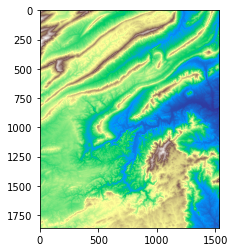

In [20]:
image = plt.imshow(x, cmap = 'terrain')

#### Below, I am just showing how plt.hist(x) will present the data in an unmodified format, before creating a much better histogram beneath that:

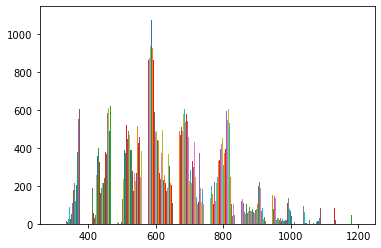

In [21]:
z = plt.hist(x)

#### Beneath, I'm taking 18 colors evenly distributed within the 'terrain' colormap, and assigning them into a list. I was hoping that I could use this techinque to have each color represent one bar on the histogram.

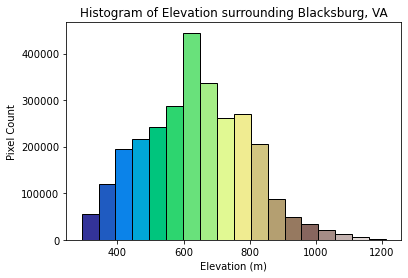

In [22]:
#Storing values from a colormap:
colorfun = plt.cm.get_cmap('terrain')
#Creating a blank list to store them
rgba = []

#My histogram has 18 bins - so I'm creating a list of 18 evenly spaced colors along the colormap for each bin.
for i in range(18):
    rgba.append(colorfun(i/18))

# Plot histogram.
n, bins, patches = plt.hist(x.ravel(), bins=18, color='grey',edgecolor='k')
bin_centers = 0.5 * (bins[:-1] + bins[1:])
plt.xlabel('Elevation (m)')
plt.ylabel('Pixel Count')
plt.title('Histogram of Elevation surrounding Blacksburg, VA')
# scale values to interval [0,1]
color = bin_centers - min(bin_centers)
color /= max(color)

for c, p in zip(color, patches):
    plt.setp(p, 'facecolor', colorfun(c))

plt.show()


#### When examining the two histograms, it's very important to note the difference between the 2. Because the data 'x' is stored as a 2D array, The plt.hist(x) function calls on each line of the array, and creates a histogram for each line. This means that the data is actually plotting over 1,500 histograms side-by-side.

#### Using the .ravel() function, takes the full 2D array, and first returns it into a 1D array, in which all the values are stored in a single unit. Because the data is now a 1D array, the histogram can be calcualted for all of the data at once, and plots a single histogram. Note the count (y axis) values are much higher (upwards of 700,000) - now, all the pixels are being counted, rather than each row of pixels being counted.

# Graduate Students

#### Beneath, I compute the slope raster using np.gradient(). The np.gradient() function takes 2 main parameters: 
* Elevation Raster (x, in our case)
* The Cell Size (d['cellsize'], in our case) - I could use the raw value, but doing it this way ensures functionality, even if we use a different raster with different cell sizes.

#### The np.gradient() function outputs 2 different values: change in x direction (gx), and change in y direction (gy). Using the pythagorean theorem lets us recover the slope (slope).
* This slope has to be converted from rise-over-run into degrees. This is done by the arcrtangent of the rise-over-run slope, and then using numpy once more to convert this radian-output into degrees.

In [23]:
gx,gy = np.gradient(x,d['cellsize'])
slope = np.sqrt(gx**2 + gy**2) #Using the pythagorean theorem to calculate 'rise over run' - aka, the slope, in our instance.

#Using this to convert the rise-over-run slope into the degree slope
slopedeg = np.rad2deg(np.arctan(slope))

#### Now that the slope is in degrees, we can create histograms and properly plot it. We can also create mean and standard deviation values, to help us have a good working understanding of the data:
* We know that the above slope calculations are working properly, based on the values within the histogram (as well as the mean/standard deviation) - We can see that the steepest slopes are around 50 degrees at maximum, and that most of the land is relatively flat (under 20 degrees).

In [24]:
mean_slope = round(np.mean(slopedeg),3)
std_slope = round(np.std(slopedeg), 3)

print("The Mean Slope is", mean_slope, "degrees.")
print("The standard deviation of the slope is", std_slope, "degrees.")

The Mean Slope is 13.52 degrees.
The standard deviation of the slope is 8.892 degrees.


Text(0.5, 1.0, 'Histogram of Slopes surrounding Blacksburg, VA')

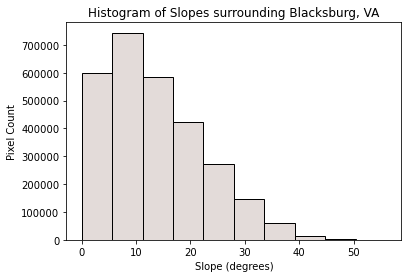

In [25]:
slopedeghist = plt.hist(slopedeg.ravel(), bins = 10, color = rgba[17], ec='black')
plt.xlabel('Slope (degrees)')
plt.ylabel('Pixel Count')
plt.title('Histogram of Slopes surrounding Blacksburg, VA')

#### Finally, we can map out our slope values.
* We use vmin and vmax to set our values between 0 and 45 degrees, just to help standardize the data and remove any potentially erroneous pixels which may throw off the colormap.
* I chose the 'pink' colormap, after looking through all of the options (https://matplotlib.org/stable/tutorials/colors/colormaps.html). I felt that the colors were best representative, as it is more brown than pink. The lighter colors represent steeper slopes.

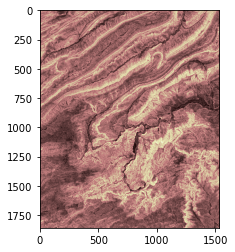

In [27]:
image3 = plt.imshow(slopedeg, vmin = 0, vmax = 45, cmap = 'pink')

## The end!